# Lab 1
Eric Miao, Sabrina Peng, Fernando Vazquez

CS7324, Fall 2020

#### Business Understanding (1.5 points total) (SABRINA)
- [1.5 points] In your own words, give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why and how was this data collected in the first place?). What is the prediction task for your data and why are other third parties interested in the result? Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to these third parties?
- Be specific and use your own words to describe the aspects of the data.


#### Data Understanding (3 points total) (SABRINA)
- [1.5 points] Load the dataset and appropriately define data types. What data type should be used to represent each data attribute? Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.  
- [1.5 points] Verify data quality: Explain any missing values or duplicate data. Visualize entries that are missing/complete for different attributes. Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation).  


#### Data Visualization (4.5 points total) (ALL)
- [2 points] Visualize basic feature distributions. That is, plot the dynamic range and exploratory distribution plots (like boxplots, histograms, kernel density estimation) to better understand the data. Describe anything meaningful or potentially useful you discover from these visualizations. These may also help to understand what data is missing or needs imputation. Note: You can also use data from other sources to bolster visualizations. Visualize at least five plots, at least one categorical and at least one numeric. 
- [2.5 points] Ask three interesting questions that are relevant to your dataset and explore visuals that help answer these questions. Use whichever visualization method is appropriate for your data.  Important: Interpret the implications for each visualization. 


#### Exceptional Work (1 points total) (ERIC)
- You have free reign to provide any additional analyses. 
- One idea (required for 7000 level students): implement dimensionality reduction using uniform manifold approximation and projection (UMAP), then visualize and interpret the results. Give an explanation of UMAP dimensionality reduction methods. You may be interested in the following information: https://github.com/lmcinnes/umap (Links to an external site.) 


## 1. Business Understanding

Financial institutions offer a variety of services, including the ability to approve customers without adequate liquid capital for loans for major purchases. These major purchases include real estate, business PP&E, and vehicles. The loan approval process is one that many customers tend to be stressed about, as the requested loan may or may not be approved by the bank or institution. Banks use customers' previous and current financial data, as well as human judgment (in the form of loan officer recommendations) to decide whether or not to approve a loan for a customer. Financial data that is crucial to making those decisions include the amount and necessity of the loan, the customer's credit history, and the customer's current financial situation.

This dataset, retrieved from Kaggle, consists of [vehicle loan data](https://www.kaggle.com/gauravdesurkar/lt-vehicle-loan-default-prediction?select=test_bqCt9Pv.csv) from Larsen & Toubro, a global conglomerate with a financial services arm, founded in Mumbai, India. The goal is to predict whether or not a customer will default on the loan given a history of financial performance and a set of demographic data - a binary classification task. To do so, we need to visualize the data in order to discover features that are important to determination of potential loan default.

It is important to be able to predict potential loan default because financial institutions want to reduce occurrences of:
1. False positives - classifying a customer as someone who will default on a loan, when he / she ends up not defaulting on the loan. This represents missed business, as the bank did not extend loans to and make profit from customers who ended up being trustworthy.
2. False negatives - classifying a customer as someone who will not default on a loan, when he / she ends up defaulting on the loan. This represents a loss to the business, as the bank wil either be forced to write off the loss on its books or go through additional steps to seize the vehicle or any other pertinent valuable assets.

Both of these errors should be avoided in order for banks to remain financially successful in their loan businesses.

### Potential Questions
- What factors most correlate with customer vehicle loan default?
- What factors should we weight most heavily when considering whether or not to approve a vehicle loan?
- What factors don't affect the probability of loan default?
- How do primary account information vs. secondary account information affect a customer's 
- How indicative is past financial performance on current and future financial performance?

## 2. Data Understanding

### 2.1 Data Description

In [1]:
import pandas as pd
import numpy as np

# load the dataset and view first few rows of training dataset
df = pd.read_csv('train.csv')
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [3]:
# set all column names to lowercase and replace . with -
df = df.rename(str.lower, axis='columns')
df.columns = df.columns.str.replace('.','_')

In [4]:
df.describe()

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,state_id,employee_code_id,...,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,no_of_inquiries,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   uniqueid                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   current_pincode_id                   233154 non-null  int64  
 8   date_of_birth                        233154 non-null  object 
 9   employment_type                      225493 non-null  object 
 10  disbursaldate                        233154 non-null  object 
 11  state_id     

There are 233,154 auto loan customers in this dataset. The above information about the dataset shows that there is almost no missing data - there are 233,154 non-null values for most columns, except the `employment_type` field. Fields that start with `pri` pertain to primary accounts, those which the customer has taken for his personal use. Fields that start with `sec` pertain to secondary accounts, those which the customer has acted as a co-applicant or guarantor.

In [6]:
# assert len(df) == len(df.duplicated(subset=['uniqueid'])==False)
assert len(df) == len(df.uniqueid.unique())

The cell above ensures that all customers (rows) are unique by checking to see that the number of rows matches the number of the number of unique IDs in the `uniqueid` field.

In [7]:
# percentage of loans that were defaulted on
print("Percentage of vehicle loans defaulted on: ", sum(df.loan_default == 1) / len(df) * 100)

Percentage of vehicle loans defaulted on:  21.70711203753742


One thing to look out for when utilizing machine learning models in classification tasks is whether or not the dataset is imbalanced - if the number of instances of one class is very small or large in comparison to other classes. In the case of our binary classification task, about 22% of vehicle loans in the dataset resulted in a loan default. This shows that the dataset is not too drastically imbalanced.

### 2.2 Data Preprocessing

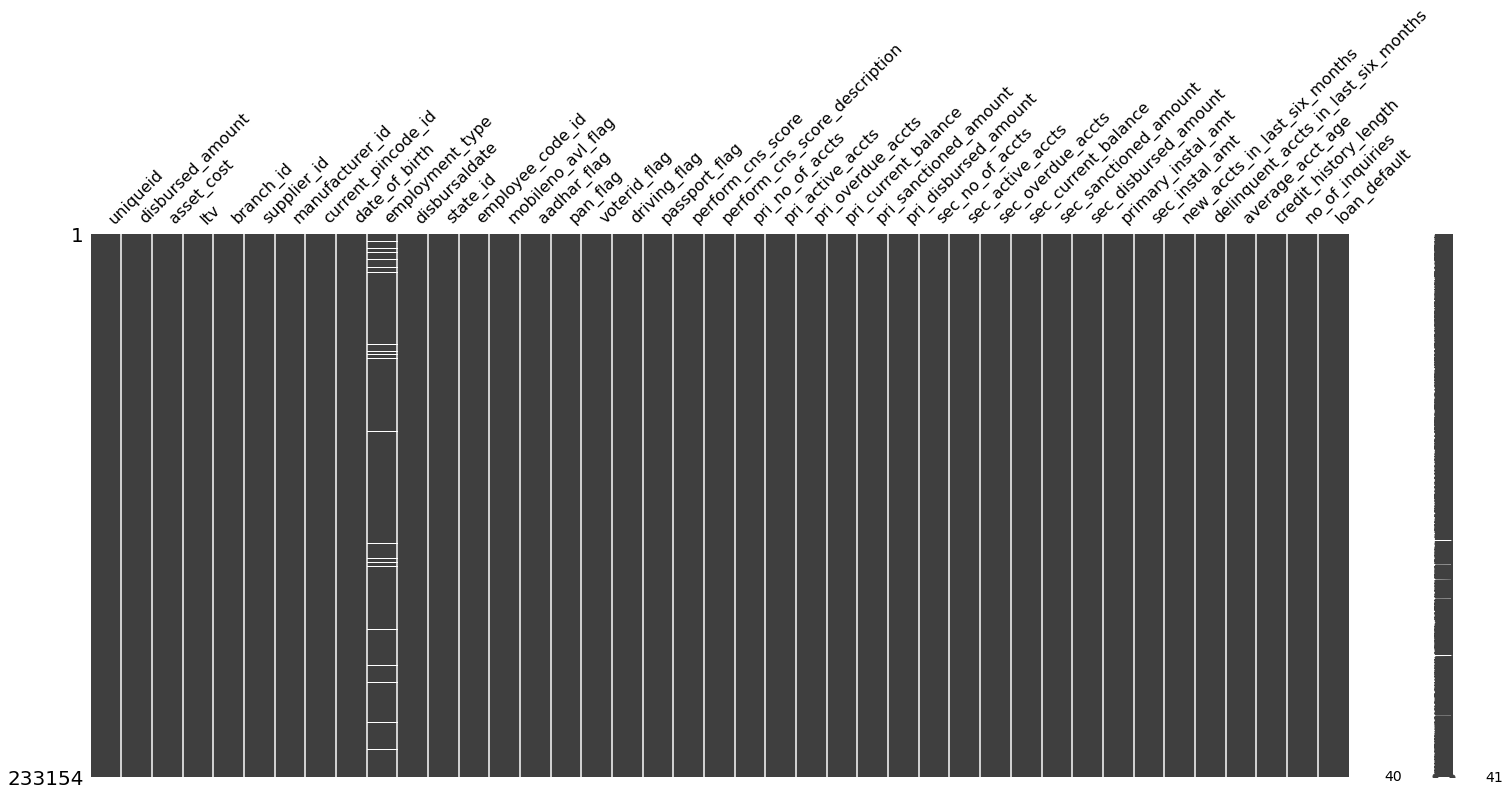

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

import missingno as mn

mn.matrix(df)
plt.show()

In [11]:
# percentage of null rows
null_rows_df = df[df.employment_type.isnull()]
print("Number of rows with missing data: ", len(null_rows_df))
print("Percentage of rows with missing data: ", len(null_rows_df) / len(df) * 100)
print("Percentage of null rows where loans were defaulted on: ", 
      len(null_rows_df[null_rows_df.loan_default == 1]) / len(null_rows_df) * 100)

Number of rows with missing data:  7661
Percentage of rows with missing data:  3.2858110948128703
Percentage of null rows where loans were defaulted on:  21.45933951181308


In [12]:
# drop rows with null values in employment type field

df_new = df.copy()
df_new = df_new.dropna()
print("New number of rows: ", len(df_new))

New number of rows:  225493


As mentioned above, the vast majority of data is present and non-null in the dataset. For the rows in which `employment_type` is null, we drop those rows, as the categorical employment type (either `Salaried` or `Self Employed`) cannot be successfully imputed with any sort of certainty, and the affected rows only comprise 3% of the total dataset. In addition, the percentage of affected rows where the loan was defaulted on was about 21%, which is very close to the 22% of total rows where the loan was defaulted on.

Therefore, we decided to drop the rows with missing employment type data instead of attempt to impute `employment_type` for those instances.

In [13]:
# change date of birth to more consumable age value
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# https://stackoverflow.com/questions/765797/python-timedelta-in-years
def convert_to_years(date):
    datetime_val = pd.to_datetime(date, format='%d-%m-%y')
    if datetime_val > datetime.now():
        return relativedelta(datetime.now(), datetime_val).years + 100
    return relativedelta(datetime.now(), datetime_val).years

In [14]:
df_new["customer_age"] = df_new.date_of_birth.apply(convert_to_years)

In [15]:
# https://stackoverflow.com/questions/4628122/how-to-construct-a-timedelta-object-from-a-simple-string
# convert average account age and credit history length from '_yrs _mon' format
# to number of months using regex matching

import re
regex = re.compile(r'(?P<year>\d+?)yrs (?P<month>\d+?)mon')

def parse_time_delta(time_delta_str):
    parts = regex.match(time_delta_str)
    if not parts:
        return
    parts = parts.groupdict()
    time_params = {}
    for (name, param) in parts.items():
        if param:
            time_params[name] = int(param)
            
    return relativedelta(**time_params)

def get_num_months(time_delta_str):
    delta = parse_time_delta(time_delta_str)
    return int(delta.year) * 12 + delta.month

In [16]:
df_new["average_acct_age"] = df_new["average_acct_age"].apply(get_num_months)
df_new["credit_history_length"] = df_new["credit_history_length"].apply(get_num_months)

Some modifications were needed to make the `date_of_birth`, `average_acct_age`, and `credit_history_length` features usable. Date of birth was converted to `customer_age` (in years), while average account age and credit history length were converted from a custom string format ("_yrs _mon") to an integer representing number of months.

In [17]:
# delete any unnecessary columns
unnecessary_cols = ["uniqueid", "branch_id", "supplier_id", "manufacturer_id", "current_pincode_id",
                    "date_of_birth", "state_id", "employee_code_id"]

flags = ["mobileno_avl_flag", "aadhar_flag", "pan_flag", "voterid_flag", "driving_flag", "passport_flag"]

In [21]:
df_new = df_new.drop(columns=(unnecessary_cols + flags))
print(len(df_new.columns))
df_new.head()

28


,disbursed_amount,asset_cost,ltv,employment_type,disbursaldate,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,...,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,customer_age
0,50578,58400,89.55,Salaried,03-08-18,0,No Bureau History Available,0,0,0,...,0,0,0,0,0,0,0,0,0,36
1,47145,65550,73.23,Self employed,26-09-18,598,I-Medium Risk,1,1,1,...,0,1991,0,0,1,23,23,0,1,35
2,53278,61360,89.63,Self employed,01-08-18,0,No Bureau History Available,0,0,0,...,0,0,0,0,0,0,0,0,0,35
3,57513,66113,88.48,Self employed,26-10-18,305,L-Very High Risk,3,0,0,...,0,31,0,0,0,8,15,1,1,26
4,52378,60300,88.39,Self employed,26-09-18,0,No Bureau History Available,0,0,0,...,0,0,0,0,0,0,0,1,1,42


We removed columns / features that had data that was not useful to loan default determination, including categorical data flags that indicated whether or not the customer disclosed information such as mobiel number, voter ID, and driver's license numbers. This leaves us with two categorical features - `employment_type` and `perform_cns_score_description`.

In [22]:
# should we make the age variable categorical instead of numerical?
df_new["age_range"] = pd.cut(x=df_new["customer_age"], 
                             bins=[0, 35, 50, 65, 1e6],
                             labels=['young career','middle career','late career','retirement age'])
df_new.age_range.describe()

count           225493
unique               4
top       young career
freq            121074
Name: age_range, dtype: object

In [24]:
# group with new age range variable
df_grouped = df_new.groupby(by=['age_range'])
print(df_grouped.age_range.count())

age_range
young career      121074
middle career      82164
late career        22124
retirement age       131
Name: age_range, dtype: int64


## 3. Data Visualizations

### Random Code (for now)

In [25]:
# list of credit bureau score descriptions (one of our categorical variables)

df_new.perform_cns_score_description.unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

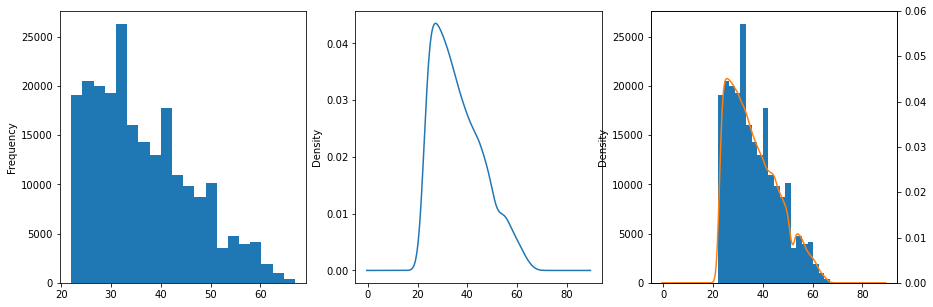

In [27]:
# histogram - KDE - (histogram & KDE) plots

fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
df_new.customer_age.plot.hist(bins=20)

plt.subplot(1,3,2)
df_new.customer_age.plot.kde(bw_method=0.2)

plt.subplot(1,3,3)
df_new.customer_age.plot.hist(bins=20)
df_new.customer_age.plot.kde(bw_method=0.1, secondary_y=True)
plt.ylim([0, 0.06])

plt.show()

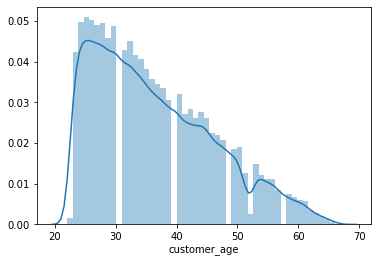

In [29]:
# seaborn - better combined histogram and KDE
import seaborn as sns

sns.distplot(df_new.customer_age)
plt.show()

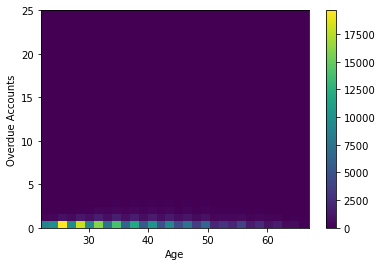

In [31]:
# 2d histogram

plt.hist2d(x=df_new.customer_age, y=df_new.pri_overdue_accts, bins=30)
plt.colorbar()
plt.xlabel("Age")
plt.ylabel("Overdue Accounts")
plt.show()

In [ ]:

vars_to_use = ['loan_default', 'customer_age', 'employment_type', 'perform_cns_score',
               'disbursed_amount', 'asset_cost', 'ltv',
               'pri_active_accts', 'pri_overdue_accts', 'pri_current_balance',
               'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
               'no_of_inquiries']

df_important_cols = df[vars_to_use]
df_important_cols.columns



In [ ]:
# matplotlib correlation matrix with specified columns

plt.pcolor(df[vars_to_use].corr())

plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use, rotation=90)
plt.colorbar()
plt.show()

In [ ]:
# seaborn correlation matrix with specified columns

cmap = sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df_important_cols.corr(), cmap=cmap, annot=True)
plt.show()

# f.tight_layout()

### Grouping the data

In [ ]:
# first group the data
df_grouped = df_new.groupby(by=['employment_type','perform_cns_score_description'])

# tabulate survival rates of each group
loan_default_rate = df_grouped.loan_default.sum() / df_grouped.loan_default.count()

# show in a bar chart using builtin pandas API
ax = loan_default_rate.plot(kind='barh')
# plt.title('Survival Percentages by Class and Age Range')
plt.show()

In [ ]:
# the cross tab operator provides an easy way to get these numbers
default = pd.crosstab([df['employment_type'],
                       df['perform_cns_score_description']], # categories to cross tabulate
                       df.loan_default.astype(bool)) # how to group
print(default)

default.plot(kind='bar', stacked=True)
plt.show()